In [1]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics.cluster import homogeneity_score

In [2]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [3]:
X, y = make_blobs(n_samples=10, centers=3, n_features=2, random_state=0)

In [4]:
centroids = np.vstack((np.random.uniform(low=-5, high=5, size=(3,)), np.random.uniform(low=-5, high=5, size=(3,)))).T
centroids_old = np.zeros(centroids.shape)

In [5]:
clusters = np.zeros(10)
error = dist(centroids, centroids_old, None)
n=10
k=3

In [6]:
while error >= 0.0001:
    for i in range(n):
        distances = dist(X[i], centroids)
        cluster = np.argmin(distances)
        clusters[i] = cluster
        centroids_old = deepcopy(centroids)
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        centroids[i] = np.mean(points, axis = 0)
    error = dist(centroids, centroids_old, None)

In [7]:
print(clusters)
print(y)

[0. 0. 1. 0. 0. 1. 2. 1. 1. 0.]
[0 0 1 0 2 2 2 1 1 0]


In [8]:
homo_score = homogeneity_score(y, clusters)
print(homo_score)

0.5636557256179745


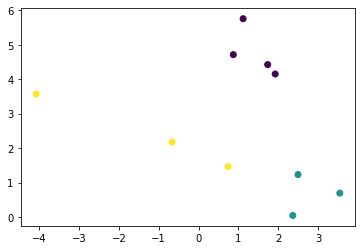

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y)